# Lab 1 - Netflix Recommendation System

In [1]:
import numpy as np
import pandas as pd

In [3]:
mData = pd.read_csv('movie_metadata.csv')
mData.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
mData.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
mData.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
mData.shape

(5043, 28)

In [8]:
mData['title_year'].min()

1916.0

In [9]:
mData['title_year'].max()

2016.0

In [11]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([   3.,    9.,   23.,   30.,   51.,   87.,  227.,  389., 1691.,
        2425.]),
 array([1916., 1926., 1936., 1946., 1956., 1966., 1976., 1986., 1996.,
        2006., 2016.]),
 <BarContainer object of 10 artists>)

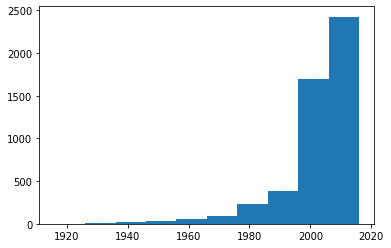

In [13]:
# We have movies from 1916 - 2016

plt.hist(mData['title_year'])

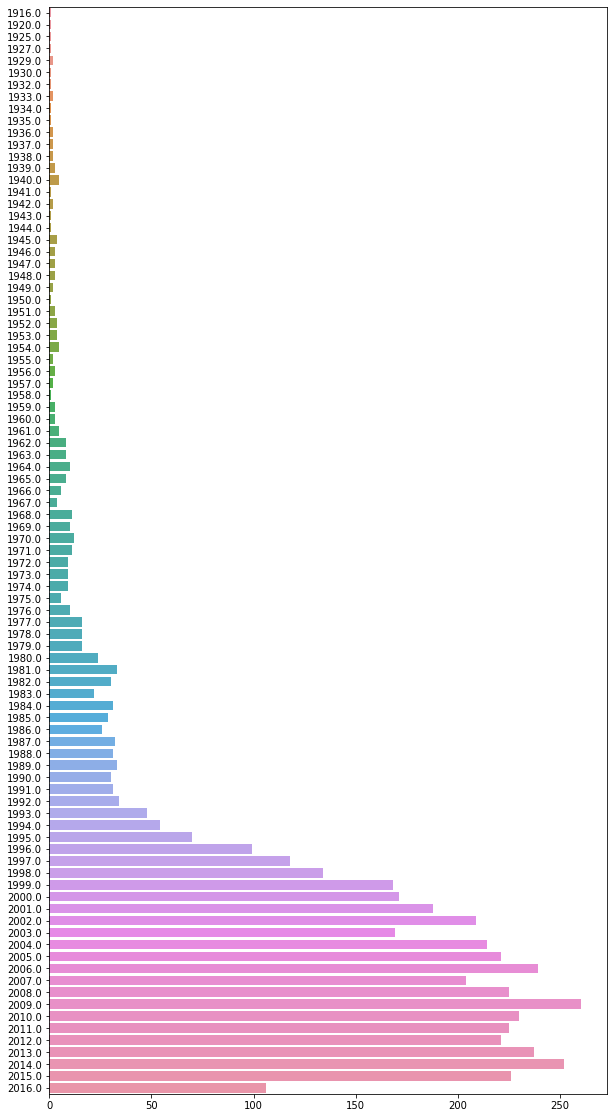

In [23]:
plt.figure(figsize=(10,20))
sns.barplot(x = mData['title_year'].value_counts().values,y =  mData['title_year'].value_counts().index, orient='h')
plt.show()

In [257]:
# We will only choose some columns

data = mData[['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']].copy()

In [258]:
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [259]:
# data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name']] = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name']].replace(np.nan, 'unknown')

In [260]:
data['director_name'].replace([np.nan],'unknown', inplace=True)
data['actor_1_name'].replace([np.nan],'unknown', inplace=True)
data['actor_2_name'].replace([np.nan],'unknown', inplace=True)
data['actor_3_name'].replace([np.nan],'unknown', inplace=True)

In [261]:
data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [262]:
data['genres'] = data['genres'].str.replace('|',' ',regex = False)

In [263]:
data['movie_title'] = data['movie_title'].str.lower()

In [269]:
data['movie_title'] = data['movie_title'].apply(lambda x: x[:-1])

In [ ]:
data.to